# MundosE - Data Science 2302 | Trabajo Integrador. Grupo 3

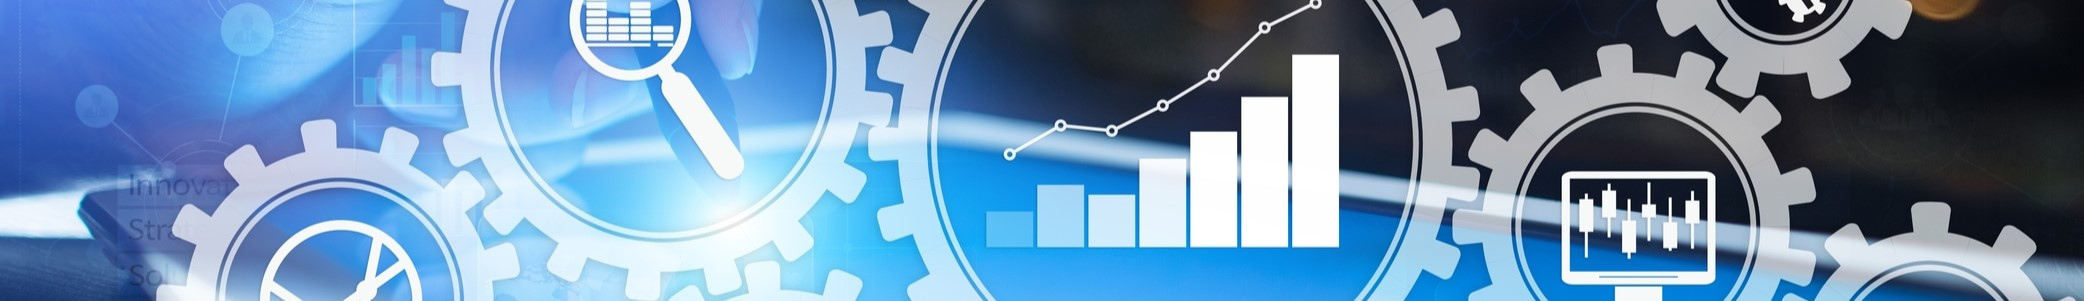

**Objetivo:**

*Determinar la relación entre distintos factores de riesgo (como consumo de tabaco, alcohol, alimentación, actividad física, entre otros) y la propensión a la hipertensión arterial, en personas de la República Argentina.*

**Descripción del dataset:**

El dataset que utilizamos para esta actividad surge de la Encuesta Nacional de Factores de Riesgo (en adelante, ENFR) que confecciona el Instituto Nacional de Estadística y Censos (INDEC), conjuntamente con el Ministerio de Salud de la Nación.
La última ENFR se llevó a cabo en 2018 y se publicó en 2019 (la cuarta), y, en la actualidad, se están definiendo los lineamientos para la realización de la quinta. Su objetivo principal es proporcionar información confiable sobre las Enfermedades No Transmisibles (en adelante, ENT), como obesidad, diabetes e hipertensión entre otras.


# Preparación de los datos

Importamos y preparamos los datos




In [ ]:
# Importamos las librerias estándar para empezar a trabajar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Descargamos por URL el archivo de datos (zip)
!wget "https://www.indec.gob.ar/ftp/cuadros/menusuperior/enfr/ENFR2018_baseusuario.zip"


--2023-10-08 23:45:06--  https://www.indec.gob.ar/ftp/cuadros/menusuperior/enfr/ENFR2018_baseusuario.zip
Resolving www.indec.gob.ar (www.indec.gob.ar)... 186.33.230.196
Connecting to www.indec.gob.ar (www.indec.gob.ar)|186.33.230.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2607289 (2.5M) [application/x-zip-compressed]
Saving to: ‘ENFR2018_baseusuario.zip.1’

ENFR2018_baseusuari 100%[===================>]   2.49M  1.87MB/s    in 1.3s    

2023-10-08 23:45:08 (1.87 MB/s) - ‘ENFR2018_baseusuario.zip.1’ saved [2607289/2607289]



In [ ]:
# Descomprimimos el archivo (va a parar a la carpeta /content/)
!unzip -o "ENFR2018_baseusuario.zip"

Archive:  ENFR2018_baseusuario.zip
  inflating: ENFR 2018 - Base usuario.txt  


In [ ]:
#creamos un dataframe con el dataset original
df_original = pd.read_csv("/content/ENFR 2018 - Base usuario.txt", sep = "|")

# Ahora, podemos trabajar con los datos en el dataframe
# Mostramos info de base
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29224 entries, 0 to 29223
Columns: 287 entries, id to wf3p
dtypes: float64(186), int64(101)
memory usage: 64.0 MB




Vemos que tiene 29224 filas con el encabezado, y 287 columnas.
<br />**186 columnas son de tipo flotante y 101 enteros.**
<br />Comenzamos a inspeccionar los datos:



In [ ]:
# Analizamos el encabezado (primeras 5 filas)
df_original.head()

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,bhcv01,bhcv02,bhcv03,...,glucemia_elevada,prevalencia_glucemia_elevada_combinada,findrisc,bimq06,bimq06_01,colesterol_elevado,prevalencia_colesterol_combinada,wf1p,wf2p,wf3p
0,1128639,2,1,1,1,1,1,3,2,1,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2378,4464,0
1,1709939,2,1,1,1,1,0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3588,0,0
2,6874130,2,1,1,1,1,0,3,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740,0,0
3,10319375,2,1,1,1,1,1,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,493,0,0
4,11140857,2,1,1,1,1,0,3,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,0,0


## Selección de las variables

Procedemos a crear un **nuevo dataframe** con las variables que nos interesa analizar.
La ENFR se divide en distintos bloques, de acuerdo a la categoría de información que abordan. Como criterio de selección, se estableció que haya por lo menos una variable cada bloque vinculado a los factores de riesgo, y para su selección se realizó una investigación preliminar acerca de la temática abordada. Se omitieron las categorías que tenían mayoría de datos incompletos (>80%), como colesterol y glucemia elevados.
```
1. nivel_instruccion (Nivel de instrucción)
2. bhch03 (Sexo biológico)
3. rango_edad (Rango de edad)
4. bisl06 (¿Cuántas horas semanales trabaja habitualmente en todos sus empleos/ ocupaciones?)
6. nivel_actividad_fisica (Nivel de actividad física)  
7. consumo_tabaco_100 (Condición de fumador)
8. imc_categorias (Índice de masa corporal agrupado)
9. bial02 (Habitualmente, ¿le agrega sal a los alimentos una vez que están cocidos o al sentarse a la mesa…)
10. consumo_regular_riesgo (Consumo regular de alcohol de riesgo)
11. ta_elevada (Presión arterial elevada)
12. prevalencia_hipertension (Prevalencia de presión arterial elevada)
```







In [ ]:
#Seleccionamos las columnas relevantes para nuestro proyecto:
df_reducido = df_original[['nivel_instruccion', 'bhch03', 'rango_edad', 'bisl06','nivel_actividad_fisica','consumo_tabaco_100','imc_categorias','bial02','consumo_regular_riesgo','ta_elevada','prevalencia_hipertension']]
df_reducido.head()

,nivel_instruccion,bhch03,rango_edad,bisl06,nivel_actividad_fisica,consumo_tabaco_100,imc_categorias,bial02,consumo_regular_riesgo,ta_elevada,prevalencia_hipertension
0,7,1,2,2.0,1.0,3,3,3,2.0,1.0,2.0
1,7,2,5,3.0,1.0,3,2,2,2.0,NaN,2.0
2,7,2,2,2.0,2.0,2,1,1,2.0,NaN,2.0
3,7,2,4,3.0,3.0,1,1,1,2.0,NaN,2.0
4,5,1,1,2.0,2.0,3,1,3,2.0,NaN,2.0


In [ ]:
# Renombramos las varibles cuyo nombre no era intuitivas:
df_reducido.columns = ['nivel_instruccion','sexo','rango_edad','horas_trabajo_semana','nivel_actividad_fisica', 'condicion_fumador', 'categoria_IMC','consumo_sal','consumo_regular_alcohol','presion_arterial_elevada','prevalencia_hipertension']
# mostramos info sobre las columnas
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29224 entries, 0 to 29223
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nivel_instruccion         29224 non-null  int64  
 1   sexo                      29224 non-null  int64  
 2   rango_edad                29224 non-null  int64  
 3   horas_trabajo_semana      17668 non-null  float64
 4   nivel_actividad_fisica    28970 non-null  float64
 5   condicion_fumador         29224 non-null  int64  
 6   categoria_IMC             29224 non-null  int64  
 7   consumo_sal               29224 non-null  int64  
 8   consumo_regular_alcohol   29070 non-null  float64
 9   presion_arterial_elevada  16227 non-null  float64
 10  prevalencia_hipertension  27142 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 2.5 MB


## Limpieza de datos

In [ ]:
# Para limpiar los datos hacemos una función recursiva que elimina todas las filas con valores 'No sabe/No contesta' (99)
def drop_nsnc(df):
  # Iterar sobre las variables del dataframe
  for variable, serie in df.items():
        # Eliminar las filas que contienen el valor '99'
        df.drop(df[df[variable] == 99].index, inplace=True)
  #return df

drop_nsnc(df_reducido)

In [ ]:
# Hacemos una copia del df_reducido y limpio, y lo llamamos df para abreviar
df = df_reducido.copy()
# Veamos como se compone el conjunto de datos definitivo con el que trabajaremos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26780 entries, 0 to 29223
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nivel_instruccion         26780 non-null  int64  
 1   sexo                      26780 non-null  int64  
 2   rango_edad                26780 non-null  int64  
 3   horas_trabajo_semana      16449 non-null  float64
 4   nivel_actividad_fisica    26562 non-null  float64
 5   condicion_fumador         26780 non-null  int64  
 6   categoria_IMC             26780 non-null  int64  
 7   consumo_sal               26780 non-null  int64  
 8   consumo_regular_alcohol   26637 non-null  float64
 9   presion_arterial_elevada  14580 non-null  float64
 10  prevalencia_hipertension  24930 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 2.5 MB


# Análisis exploratorio

Análisis preliminar de datos para descubrir relaciones entre medidas en los datos y para obtener una idea de las tendencias, patrones y relaciones entre las entidades presentes en el conjunto de datos, con la ayuda de estadísticas y herramientas de visualización.

Revisando la documentación, la primera conclusión es que todas las variables son categóricas, y en la base de datos se han representado con números.

In [ ]:
# describimos el dataset
# a pesar de que todas las variables son categóricas, nos sirve para ver
# los valores mínimos y máximos que toma cada una, y la cant. de datos completos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nivel_instruccion,26780.0,4.750075,1.584121,1.0,3.0,5.0,6.0,8.0
sexo,26780.0,1.558402,0.496587,1.0,1.0,2.0,2.0,2.0
rango_edad,26780.0,3.176363,1.266794,1.0,2.0,3.0,4.0,5.0
horas_trabajo_semana,16449.0,1.867955,0.777667,1.0,1.0,2.0,2.0,3.0
nivel_actividad_fisica,26562.0,2.295384,0.742834,1.0,2.0,2.0,3.0,3.0
condicion_fumador,26780.0,2.368447,0.813676,1.0,2.0,3.0,3.0,3.0
categoria_IMC,26780.0,1.892233,0.784455,1.0,1.0,2.0,3.0,3.0
consumo_sal,26780.0,2.502353,0.715959,1.0,2.0,3.0,3.0,3.0
consumo_regular_alcohol,26637.0,1.922964,0.266653,1.0,2.0,2.0,2.0,2.0
presion_arterial_elevada,14580.0,1.601646,0.489576,1.0,1.0,2.0,2.0,2.0


## Valores faltantes

In [ ]:
#identificamos la cantidad de valores faltantes en cada columna
print('Cantidad de filas totales: ' + str(len(df)))
print('Valores faltantes por variable:')
df.isnull().sum()

Cantidad de filas totales: 26780
Valores faltantes por variable:


nivel_instruccion               0
sexo                            0
rango_edad                      0
horas_trabajo_semana        10331
nivel_actividad_fisica        218
condicion_fumador               0
categoria_IMC                   0
consumo_sal                     0
consumo_regular_alcohol       143
presion_arterial_elevada    12200
prevalencia_hipertension     1850
dtype: int64

## Análisis univariado

Creamos funciones que nos facilitarán hacer gráficos de barras

In [ ]:
# Esta funcion grafica un countplot para la variable del parámetro col y pone el valor de la variable en el centro de la barra, y el porcentaje arriba
def count_plot(df, col):
    plt.figure(figsize=(5,4))
    ax = sns.countplot(data=df,x=col)
    total = len(df[col])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2., height / 2., int(height), ha="center")
      percentage = f'{100 * p.get_height() / total:.1f}%'
      ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=9,
                        color='gray', xytext=(0, 5),
                        textcoords='offset points')
    plt.xticks(rotation=90)
    plt.ylabel('Cantidad')
    plt.show()

In [ ]:
# Esta es una variante de la función anterior que permite incorporar otra variable para comparar
def count_plot_hue(df, col, f_hue):
    plt.figure(figsize=(5,4))
    ax = sns.countplot(data=df,x=col, hue=f_hue)
    total = len(df[col])
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x() + p.get_width() / 2., height / 2., int(height), ha="center")
      percentage = f'{100 * p.get_height() / total:.1f}%'
      ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=9,
                        color='gray', xytext=(0, 5),
                        textcoords='offset points')
    plt.xticks(rotation=90)
    plt.ylabel('Cantidad')
    plt.show()

A partir de aquí, categorizaremos cada variable, convirtiendo los valores en la categoría que representan, y las incorporaremos al dataframe.
Esto facilitará la lectura e interpretación de los datos.

nivel_instruccion (Nivel de instrucción)
1. Sin instrucción
2. Primario incompleto
3. Primario completo
4. Secundario incompleto
5. Secundario completo
6. Terciario/universitario incompleto
7. Terciario/universitario completo
8. Educación especial.


In [ ]:
# Categorizamos la variable, ya que como valores tiene números
# se podria usar df["nivel_instruccion"].unique()
ni_valores = 8
ni_categorias = ["Sin inst.", "Prim. inc.", "Prim. comp.", "Sec. inc.", "Sec. comp.", "T/Univ. inc.", "T/Univ. comp.", "Educ. esp."]
# Agregamos a df una nueva variable con las categorías
df["nivel_instruccion_cat"] = pd.cut(x=df["nivel_instruccion"], bins=ni_valores, labels=ni_categorias)
df["nivel_instruccion_cat"].info()

<class 'pandas.core.series.Series'>
Int64Index: 26780 entries, 0 to 29223
Series name: nivel_instruccion_cat
Non-Null Count  Dtype   
--------------  -----   
26780 non-null  category
dtypes: category(1)
memory usage: 235.7 KB


In [ ]:
# validamos el mapeo de los datos
df[["nivel_instruccion", "nivel_instruccion_cat"]].head(10)

,nivel_instruccion,nivel_instruccion_cat
0,7,T/Univ. comp.
1,7,T/Univ. comp.
2,7,T/Univ. comp.
3,7,T/Univ. comp.
4,5,Sec. comp.
5,5,Sec. comp.
6,5,Sec. comp.
7,7,T/Univ. comp.
8,7,T/Univ. comp.
9,7,T/Univ. comp.


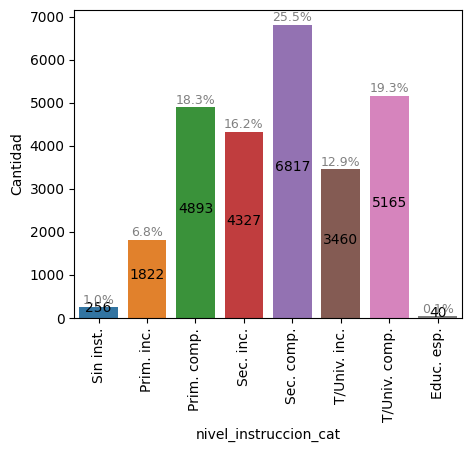

In [ ]:
# graficamos la variable
count_plot(df, "nivel_instruccion_cat")

sexo (Sexo biológico)
1. Varón
2. Mujer

In [ ]:
# Categorizamos la variable, ya que como valores tiene números
sx_valores = 2
sx_categorias = ["Varón", "Mujer"]
# Agregamos a df una nueva variable con las categorías
df["sexo_cat"] = pd.cut(x=df["sexo"], bins=sx_valores, labels=sx_categorias)
df["sexo_cat"].info()

<class 'pandas.core.series.Series'>
Int64Index: 26780 entries, 0 to 29223
Series name: sexo_cat
Non-Null Count  Dtype   
--------------  -----   
26780 non-null  category
dtypes: category(1)
memory usage: 235.5 KB


In [ ]:
# validamos el mapeo de los datos
df[["sexo", "sexo_cat"]].head(10)

,sexo,sexo_cat
0,1,Varón
1,2,Mujer
2,2,Mujer
3,2,Mujer
4,1,Varón
5,1,Varón
6,1,Varón
7,2,Mujer
8,1,Varón
9,2,Mujer


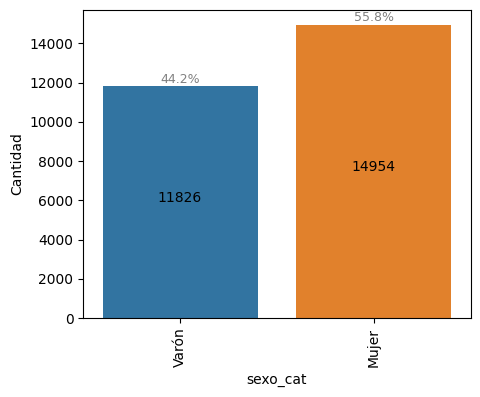

In [ ]:
count_plot(df, "sexo_cat")

rango_edad (Rango de edad)
1. 18 a 24 años
2. 25 a 34 años
3. 35 a 49 años
4. 50 a 64 años
5. 65 años y más


In [ ]:
# Categorizamos la variable
re_valores = 5
re_categorias = ["18-24", "25-34", "35-49", "50-64", "65+"]
# Agregamos a df una nueva variable con las categorías
df["rango_edad_cat"] = pd.cut(x=df["rango_edad"], bins=re_valores, labels=re_categorias)
df["rango_edad_cat"].info()

<class 'pandas.core.series.Series'>
Int64Index: 26780 entries, 0 to 29223
Series name: rango_edad_cat
Non-Null Count  Dtype   
--------------  -----   
26780 non-null  category
dtypes: category(1)
memory usage: 235.6 KB


In [ ]:
# validamos el mapeo de los datos
df[["rango_edad", "rango_edad_cat"]].head(10)

,rango_edad,rango_edad_cat
0,2,25-34
1,5,65+
2,2,25-34
3,4,50-64
4,1,18-24
5,2,25-34
6,2,25-34
7,3,35-49
8,2,25-34
9,5,65+


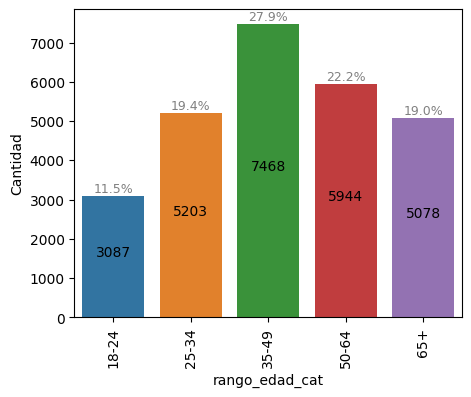

In [ ]:
count_plot(df, "rango_edad_cat")

horas_trabajo: ¿Cuántas horas semanales trabaja habitualmente en todos sus empleos/ocupaciones?
1. Menos de 35 horas semanales
2. Entre 35 y 45 horas semanales
3. Más de 45 horas semanales


In [ ]:
# Categorizamos la variable
ht_valores = 3
ht_categorias = ["Menos de 35h", "Entre 35 y 45h", "Más de 45h"]
# Agregamos a df una nueva variable con las categorías
df["horas_trabajo_semana_cat"] = pd.cut(x=df["horas_trabajo_semana"], bins=ht_valores, labels=ht_categorias)


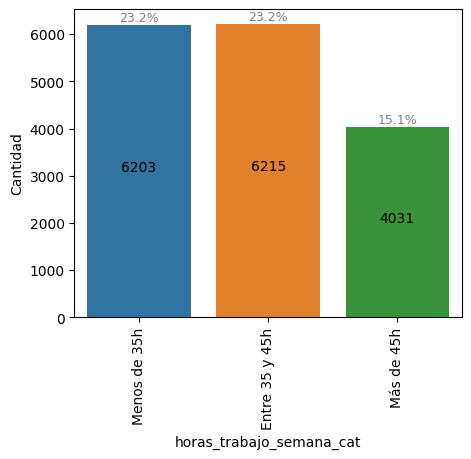

In [ ]:
count_plot(df, "horas_trabajo_semana_cat")

nivel_actividad_fisica (Nivel de actividad física)  
1. Alto
2. Medio
3. Bajo


In [ ]:
# Categorizamos la variable
af_valores = 3
af_categorias = ["Alto", "Medio", "Bajo"]
# Agregamos a df una nueva variable con las categorías
df["nivel_actividad_fisica_cat"] = pd.cut(x=df["nivel_actividad_fisica"], bins=af_valores, labels=af_categorias)

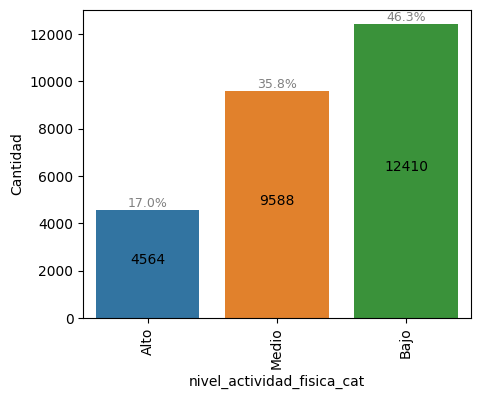

In [ ]:
count_plot(df, "nivel_actividad_fisica_cat")

condicion_fumador (Condición de fumador)
1. Fumador actual
2. Ex fumador
3. No fumador


In [ ]:
# Categorizamos la variable
cf_valores = 3
cf_categorias = ["Fumador", "Ex fumador", "No fumador"]
# Agregamos a df una nueva variable con las categorías
df["condicion_fumador_cat"] = pd.cut(x=df["condicion_fumador"], bins=cf_valores, labels=cf_categorias)

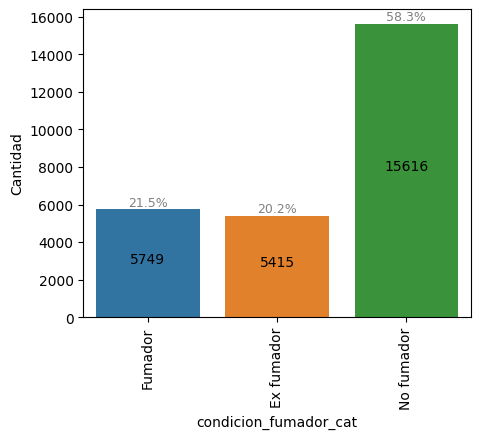

In [ ]:
count_plot(df, "condicion_fumador_cat")

categoria_IMC (Índice de masa corporal agrupado)
1. Bajo (<25)
2. Medio (>=25 y <30)
3. Alto (>=30)


In [ ]:
# Categorizamos la variable
imc_valores = 3
imc_categorias = ["Bajo", "Medio", "Alto"]
# Agregamos a df una nueva variable con las categorías
df["categoria_IMC_cat"] = pd.cut(x=df["categoria_IMC"], bins=imc_valores, labels=imc_categorias)

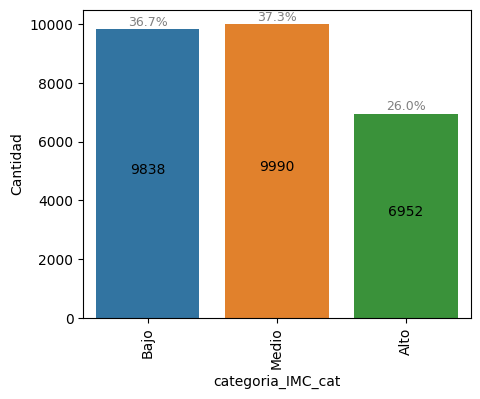

In [ ]:
count_plot(df, "categoria_IMC_cat")

consumo_sal (Habitualmente, ¿le agrega sal a los alimentos una vez que están cocidos o al sentarse a la mesa…)
1. …siempre o casi siempre?
2. …raras veces?
3. …nunca?

In [ ]:
# Categorizamos la variable
cs_valores = 3
cs_categorias = ["Casi siempre", "Raras veces", "Nunca"]
# Agregamos a df una nueva variable con las categorías
df["consumo_sal_cat"] = pd.cut(x=df["consumo_sal"], bins=cs_valores, labels=cs_categorias)

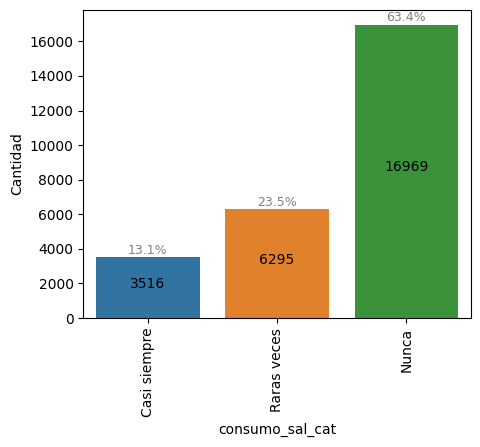

In [ ]:
count_plot(df, "consumo_sal_cat")

consumo_regular_alcohol (Consumo regular de alcohol de riesgo)
1. Sí
2. No


In [ ]:
# Categorizamos la variable
al_valores = 2
al_categorias = ["Si", "No"]
# Agregamos a df una nueva variable con las categorías
df["consumo_regular_alcohol_cat"] = pd.cut(x=df["consumo_regular_alcohol"], bins=al_valores, labels=al_categorias)

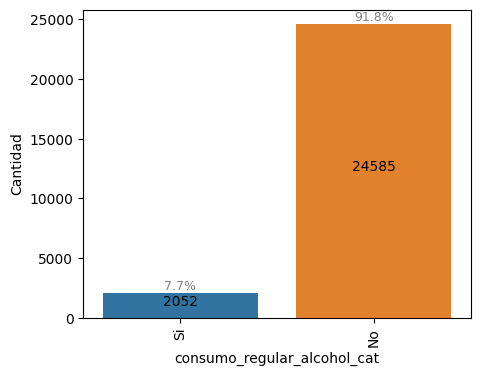

In [ ]:
count_plot(df, "consumo_regular_alcohol_cat")

presion_arterial_elevada (Presión arterial elevada)
1. Elevada
2. No elevada


In [ ]:
# Categorizamos la variable
pa_valores = 2
pa_categorias = ["Elevada", "No elevada"]
# Agregamos a df una nueva variable con las categorías
df["presion_arterial_elevada_cat"] = pd.cut(x=df["presion_arterial_elevada"], bins=pa_valores, labels=pa_categorias)

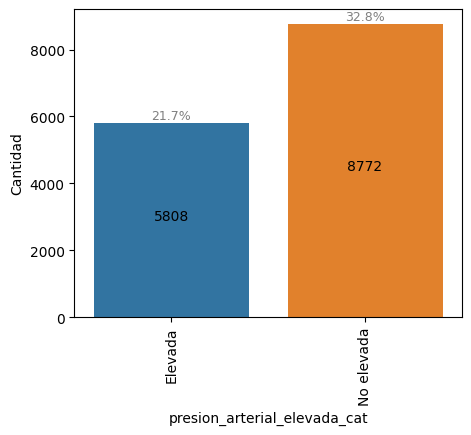

In [ ]:
count_plot(df, "presion_arterial_elevada_cat")

prevalencia_hipertension (Prevalencia de presión arterial elevada)
1. Sí
2. No


In [ ]:
# Categorizamos la variable
prev_valores = 2
prev_categorias = ["Si", "No"]
# Agregamos a df una nueva variable con las categorías
df["prevalencia_hipertension_cat"] = pd.cut(x=df["prevalencia_hipertension"], bins=prev_valores, labels= prev_categorias)

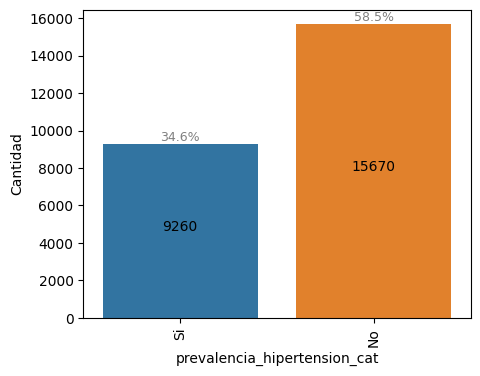

In [ ]:
count_plot(df, "prevalencia_hipertension_cat")

De esta manera, el dataframe queda ahora con 22 variables: 11 con valores numéricos y 11 con valores objeto

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26780 entries, 0 to 29223
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   nivel_instruccion             26780 non-null  int64   
 1   sexo                          26780 non-null  int64   
 2   rango_edad                    26780 non-null  int64   
 3   horas_trabajo_semana          16449 non-null  float64 
 4   nivel_actividad_fisica        26562 non-null  float64 
 5   condicion_fumador             26780 non-null  int64   
 6   categoria_IMC                 26780 non-null  int64   
 7   consumo_sal                   26780 non-null  int64   
 8   consumo_regular_alcohol       26637 non-null  float64 
 9   presion_arterial_elevada      14580 non-null  float64 
 10  prevalencia_hipertension      24930 non-null  float64 
 11  nivel_instruccion_cat         26780 non-null  category
 12  sexo_cat                      26780 non-null  

## Análisis bivariado

A continuación, procedemos a confeccionar las tablas de contingencias, donde se relacionan la variable explicada del modelo (recordemos que es prevalencia de hipertensión), con cada una de las explicativas. Para mayor claridad interpretativa, las cifras están expresadas como porcentaje del total.
**Es importante aclarar que los valores totales de las categorías no suman el 100% por la presencia de un 7% de datos faltantes en la variable prevalencia de hipertensión.**



In [ ]:
# Armamos las tablas de contingencia para, de esta forma, obtener evidencia preliminar acerca de la existencia de relaciones
# entre la variable explicada y las explicativas de nuestro modelo
tabla0 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["nivel_instruccion_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla1 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["sexo_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla2 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["rango_edad_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla3 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["horas_trabajo_semana_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla4 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["nivel_actividad_fisica_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla5 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["condicion_fumador_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla6 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["categoria_IMC_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla7 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["consumo_sal_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla8 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["consumo_regular_alcohol_cat"], margins = True).apply(lambda r: round(r/len(df)*100))
tabla9 = pd.crosstab(index = df["prevalencia_hipertension_cat"], columns = df["presion_arterial_elevada_cat"], margins = True).apply(lambda r: round(r/len(df)*100))


In [ ]:
tabla0 # Relaciona nivel de instrucción con prevalencia de hipertensión

nivel_instruccion_cat,Sin inst.,Prim. inc.,Prim. comp.,Sec. inc.,Sec. comp.,T/Univ. inc.,T/Univ. comp.,Educ. esp.,All
prevalencia_hipertension_cat,,,,,,,,,
Si,0.0,4.0,8.0,5.0,8.0,3.0,6.0,0.0,35.0
No,0.0,3.0,8.0,9.0,16.0,9.0,13.0,0.0,59.0
All,1.0,6.0,17.0,14.0,24.0,12.0,19.0,0.0,93.0


In [ ]:
tabla1 # Relaciona la prevalencia de hipertensión con el sexo del encuestado


sexo_cat,Varón,Mujer,All
prevalencia_hipertension_cat,,,
Si,14.0,20.0,35.0
No,26.0,33.0,59.0
All,40.0,53.0,93.0


In [ ]:
tabla2 #Relaciona la prevalencia de hipertensión con la edad del encuestado


rango_edad_cat,18-24,25-34,35-49,50-64,65+,All
prevalencia_hipertension_cat,,,,,,
Si,2.0,4.0,8.0,10.0,12.0,35.0
No,8.0,14.0,19.0,11.0,7.0,59.0
All,10.0,17.0,26.0,22.0,19.0,93.0


In [ ]:
tabla3 #Relaciona la prevalencia de la hipertensión con las hs. de trabajo semanales


horas_trabajo_semana_cat,Menos de 35h,Entre 35 y 45h,Más de 45h,All
prevalencia_hipertension_cat,,,,
Si,7.0,6.0,4.0,17.0
No,14.0,15.0,10.0,39.0
All,21.0,21.0,14.0,57.0


In [ ]:
tabla4 #Relaciona la prevalencia de la hipertensión con el nivel de actividad física


nivel_actividad_fisica_cat,Alto,Medio,Bajo,All
prevalencia_hipertension_cat,,,,
Si,4.0,12.0,18.0,34.0
No,11.0,22.0,25.0,58.0
All,16.0,33.0,43.0,92.0


In [ ]:
tabla5 #Relaciona la prevalencia de la hipertensión con la condición de fumador/no fumador


condicion_fumador_cat,Fumador,Ex fumador,No fumador,All
prevalencia_hipertension_cat,,,,
Si,6.0,9.0,20.0,35.0
No,13.0,11.0,35.0,59.0
All,19.0,20.0,54.0,93.0


In [ ]:
tabla6 #Relaciona la prevalencia de hipertensión con los niveles de Indice de Masa Corporal (IMC)


categoria_IMC_cat,Bajo,Medio,Alto,All
prevalencia_hipertension_cat,,,,
Si,9.0,13.0,13.0,35.0
No,25.0,22.0,12.0,59.0
All,34.0,35.0,25.0,93.0


In [ ]:
tabla7 #Relaciona la prevalencia de hipertensión con el consumo de sal


consumo_sal_cat,Casi siempre,Raras veces,Nunca,All
prevalencia_hipertension_cat,,,,
Si,4.0,7.0,24.0,35.0
No,8.0,15.0,36.0,59.0
All,12.0,22.0,60.0,93.0


In [ ]:
tabla8 #Relaciona la prevalencia de hipertensión con el consumo frecuente de alcohol



consumo_regular_alcohol_cat,Si,No,All
prevalencia_hipertension_cat,,,
Si,2.0,32.0,34.0
No,5.0,54.0,58.0
All,7.0,86.0,93.0


In [ ]:
tabla9 #Relaciona la prevalencia de hipertensión con los estudios de presión arterial
# esta tabla vincula el rango de edad con la prevalencia de hipertensión

presion_arterial_elevada_cat,Elevada,No elevada,All
prevalencia_hipertension_cat,,,
Si,11.0,8.0,19.0
No,10.0,22.0,32.0
All,21.0,30.0,51.0


## Análisis de correlación

Analizamos las correlaciones entre cols respecto a la variable a predecir (prevalencia_hipertension)

Dado que todas las variables son categóricas, podemos utilizar **matrices de contingencia y aplicar la prueba de Chi-cuadrado.**

In [ ]:
# Importamos scipy para usar la prueba de chi-cuadrado, pasando como parámetro
# una matriz de contingencia que utiliza la función crosstab de pandas
from scipy.stats import chi2_contingency

#función para aplicar la prueba de chi-cuadrado entre 2 variables
def contingency_table_chi_square(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # return contingency_table, chi2, p, dof, expected
    print(f"Columna 1: {col1}\nColumna 2: {col2}\nTabla de contingencia:\n{contingency_table}\nPrueba Chi-cuadrado:\nchi2 = {chi2:.4f}, p-valor = {p:.5f}\nGrados de libertad = {dof}\n")


# Creamos otra función, que aplica la prueba de chi-cuadrado en forma recursiva
def apply_contingency_table_chi_square(df, col):

    for column in df.columns:
        if column != col:
            contingency_table = pd.crosstab(df[column], df[col])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(f"Columna: {column}\nTabla de contingencia:\n{contingency_table}\nPrueba Chi-cuadrado:\nchi2 = {chi2:.4f}, p-valor = {p:.5f}\nGrados de libertad = {dof}\n")

La función `apply_contingency_table_chi_square` toma dos argumentos: df, que es el DataFrame que contiene los datos que deseas graficar y col, que es el nombre de la columna contra la que deseas comparar todas las demás columnas. La función utiliza un bucle for para iterar sobre todas las columnas del DataFrame excepto la columna especificada por col. Luego, utiliza pandas crosstab para crear una tabla de contingencia entre cada columna y la columna especificada. Finalmente, utiliza `chi2_contingency` de Scipy para calcular la prueba de chi cuadrado y muestra los resultados.



In [ ]:
# Hacemos una prueba de chi-cuadrado con una variable, para probar
contingency_table_chi_square(df, "prevalencia_hipertension_cat", "sexo_cat")

Columna 1: prevalencia_hipertension_cat
Columna 2: sexo_cat
Tabla de contingencia:
sexo_cat                      Varón  Mujer
prevalencia_hipertension_cat              
Si                             3787   5473
No                             6909   8761
Prueba Chi-cuadrado:
chi2 = 24.1137, p-valor = 0.00000
Grados de libertad = 1



El valor p es una medida de la probabilidad de que los resultados observados se deban al azar. Un valor p de exactamente 0 indica que la probabilidad de que los resultados se deban al azar es extremadamente baja, lo que sugiere que hay una asociación significativa entre las variables. En otras palabras, el valor p indica la fuerza de la evidencia en contra de la hipótesis nula (la hipótesis de que no hay asociación entre las variables).

Corremos la función que aplica la prueba de chi-cuadrado en forma recursiva,
sobre las variables que terminan en "_cat"

In [ ]:
# Seleccionar solo las columnas que terminan en "_cat" y aplicamos la función recursiva
df_cat = df.loc[:, df.columns.str.endswith('_cat')]
apply_contingency_table_chi_square(df_cat, "prevalencia_hipertension_cat")

Columna: nivel_instruccion_cat
Tabla de contingencia:
prevalencia_hipertension_cat    Si    No
nivel_instruccion_cat                   
Sin inst.                      125   101
Prim. inc.                     950   737
Prim. comp.                   2259  2271
Sec. inc.                     1423  2453
Sec. comp.                    2146  4163
T/Univ. inc.                   812  2429
T/Univ. comp.                 1536  3487
Educ. esp.                       9    29
Prueba Chi-cuadrado:
chi2 = 936.8973, p-valor = 0.00000
Grados de libertad = 7

Columna: sexo_cat
Tabla de contingencia:
prevalencia_hipertension_cat    Si    No
sexo_cat                                
Varón                         3787  6909
Mujer                         5473  8761
Prueba Chi-cuadrado:
chi2 = 24.1137, p-valor = 0.00000
Grados de libertad = 1

Columna: rango_edad_cat
Tabla de contingencia:
prevalencia_hipertension_cat    Si    No
rango_edad_cat                          
18-24                          420  2133
25

El gráfico de pairplot de Seaborn se utiliza para visualizar las relaciones entre pares de variables en un conjunto de datos. Este gráfico muestra la distribución de cada variable en la diagonal y las relaciones bivariadas entre cada par de variables en el resto del gráfico.

El gráfico pairplot es útil para explorar rápidamente las relaciones entre múltiples variables y detectar patrones interesantes en los datos. También se puede utilizar para identificar posibles correlaciones entre variables.
Con **azul** se muestra la prevalencia de hipertensión elevada.

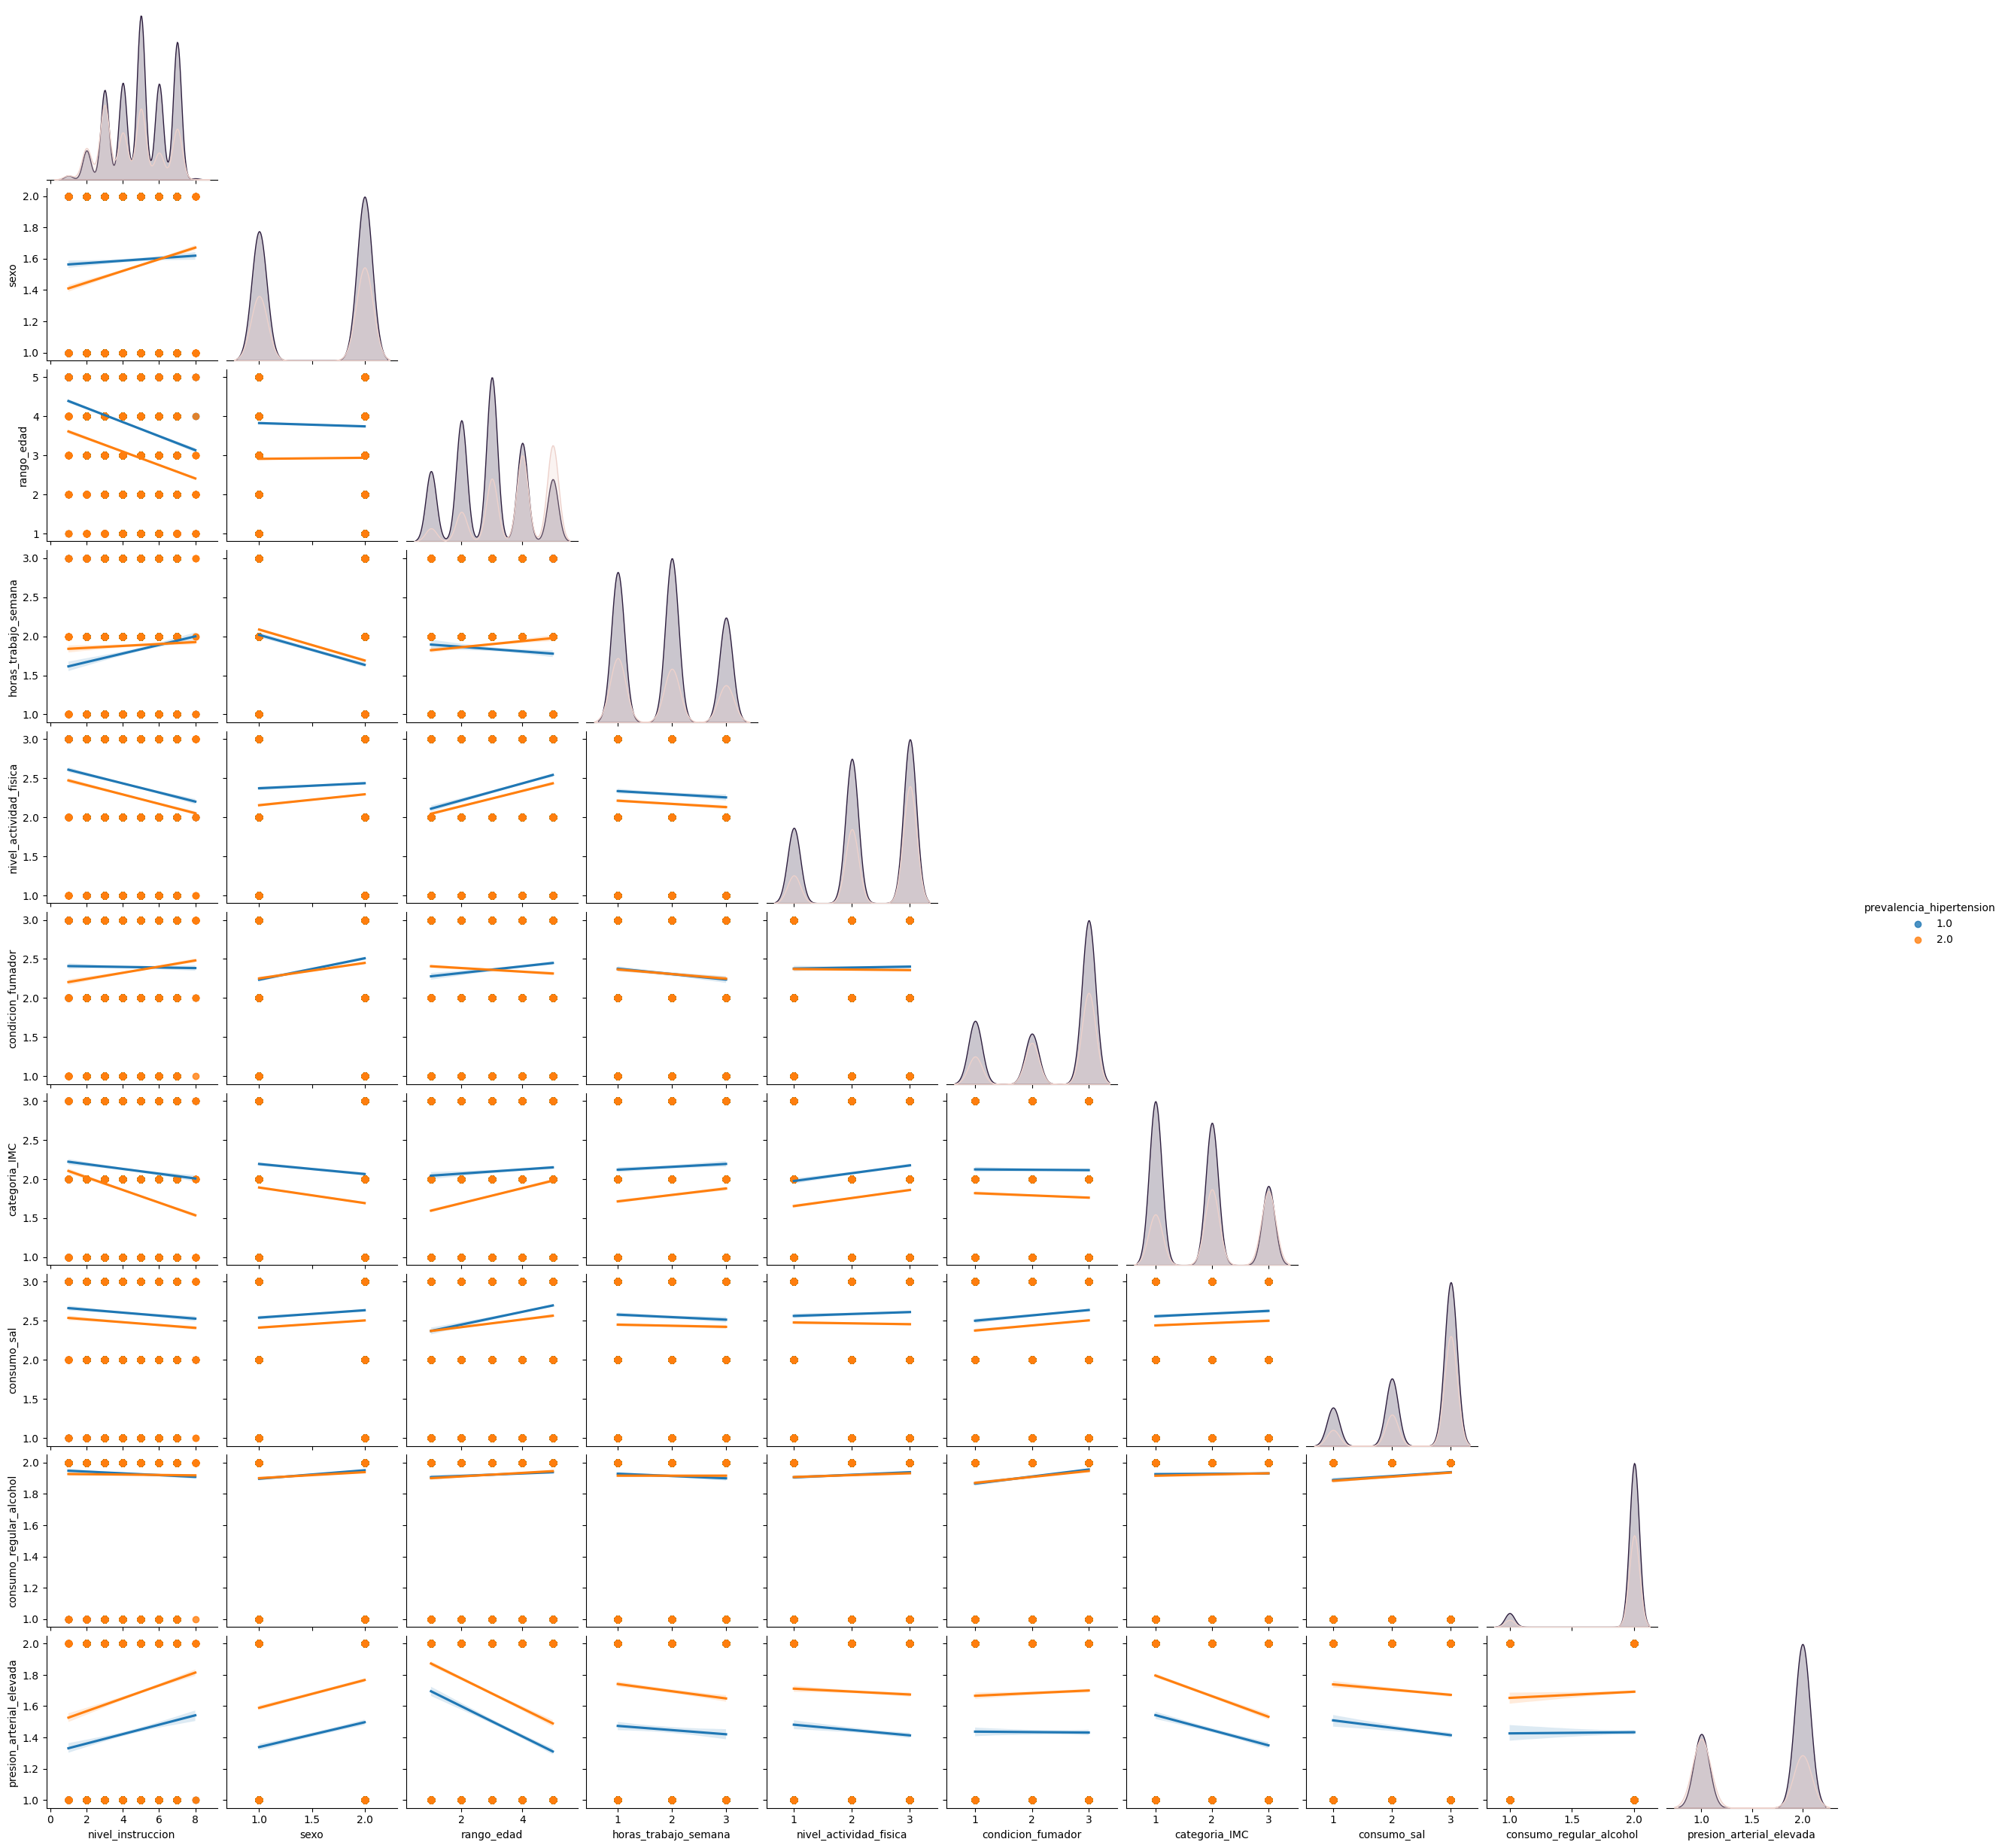

In [ ]:
# Seleccionamos sólo las columnas que NO terminan en "_cat" y graficamos un pairplot
df_sincat = df.filter(regex=r'^(?!.*_cat$).*')
sns.pairplot(df_sincat, hue='prevalencia_hipertension', kind='reg', corner=True)
plt.show()

# Conclusiones

Luego de realizar las pruebas de independencia sobre las variables predictoras y la variable predecida **Prevalencia de hipertensión**, se obtiene evidencia acerca de una muy fuerte relación entre las mismas, con excepción de **Consumo regular de alcohol en exceso**, la cual arroja un p-valor de 0.0546 en la prueba de independencia de Chi-cuadrado.

Dado que la mayoría de las variables arrojaron un p-valor muy cercano a 0 en las pruebas de independencia de Chi-cuadrado, se sugiere profundizar el presente trabajo a fin de analizar esta situación.

## Trabajo futuro

La regresión lineal es un modelo que se utiliza para analizar la relación entre una variable dependiente y una o más variables independientes continuas. Por lo tanto, no es apropiado aplicar un modelo de regresión lineal sólo con variables categóricas, ya que estas no son continuas.

Sin embargo, existen modelos de regresión que se pueden utilizar para analizar variables categóricas. Uno de estos modelos es la regresión logística, que se utiliza para predecir la probabilidad de un evento binario (sí/no) en función de una o más variables independientes categóricas o continuas. Otro modelo es la regresión de Poisson, que se utiliza para analizar datos de conteo y predecir la frecuencia de un evento en función de una o más variables independientes categóricas o continuas.